# Cursos de Series de tiempo con *Machine Learning*
## Modulo . Manipulacion de Series de Tiempo con Polars
                        Elaborado por: Naren Castellon

<center><img src="./imagen/polars%20time%20series%20copia.png" width="800" height="500"></center>

# Importancia de usar Polars para el análisis de datos

Polars se ha convertido en una herramienta valiosa para el análisis de datos debido a sus características y ventajas que la diferencian de otras opciones populares como Pandas:

**1. Rendimiento y escalabilidad:**

* Polars está escrito en Rust, un lenguaje de programación conocido por su velocidad y eficiencia. Esto permite a Polars procesar grandes conjuntos de datos de manera mucho más rápida que Pandas, especialmente en operaciones que implican cálculos complejos o transformaciones de datos.
* La arquitectura de Polars está optimizada para el análisis vectorializado, lo que significa que puede realizar operaciones en columnas enteras de datos de manera simultánea, lo que aumenta aún más su rendimiento.
* Esta combinación de velocidad y escalabilidad hace que Polars sea ideal para trabajar con conjuntos de datos masivos y para realizar análisis complejos que requieren un alto rendimiento computacional.

**2. Facilidad de uso y sintaxis intuitiva:**

* Polars ofrece una sintaxis similar a Pandas, lo que facilita la transición para usuarios familiarizados con esta biblioteca.
* La API de Polars es intuitiva y fácil de aprender, lo que permite a los analistas de datos comenzar a trabajar con la herramienta de manera rápida y eficiente.
* Polars proporciona documentación completa y ejemplos detallados que ayudan a los usuarios a comprender y utilizar sus funciones de manera efectiva.

**3. Potentes funciones para la manipulación y análisis de datos:**

* Polars ofrece una amplia gama de funciones para la manipulación y análisis de datos, incluyendo filtrado, ordenamiento, agregación, transformación de datos y creación de nuevas variables.
* La biblioteca también incluye funciones para trabajar con fechas y horas, cadenas de texto, valores categóricos y datos numéricos.
* Estas funciones permiten a los analistas de datos realizar tareas de análisis de datos complejas de manera eficiente y sin necesidad de recurrir a otras herramientas.

**4. Integración con otras bibliotecas de Python:**

* Polars se integra a la perfección con otras bibliotecas populares de Python para el análisis de datos, como NumPy, SciPy y Matplotlib.
* Esto permite a los usuarios combinar las capacidades de Polars con las de otras herramientas para crear flujos de trabajo de análisis de datos más completos y eficientes.
* La integración con otras bibliotecas amplía las posibilidades de análisis y visualización de datos que se pueden lograr con Polars.

**5. Desarrollo activo y comunidad en crecimiento:**

* Polars es un proyecto de código abierto en constante desarrollo, con nuevas funciones y mejoras que se añaden regularmente.
* La comunidad de usuarios de Polars está creciendo rápidamente, lo que significa que hay un gran apoyo y recursos disponibles para los usuarios que necesitan ayuda o desean aprender más sobre la herramienta.
* El desarrollo activo y la comunidad en crecimiento garantizan que Polars se mantenga actualizada con las últimas necesidades y tendencias del análisis de datos.




Polars es una biblioteca de Python para el análisis de datos tabulares que ofrece una sintaxis intuitiva y un alto rendimiento. Al igual que otras bibliotecas como Pandas, Polars facilita la manipulación y transformación de series de tiempo.

Polars ofrece una amplia gama de funciones para la manipulación de series de tiempo, desde la selección de filas hasta la creación de nuevas características y la visualización de datos. 

Polars tiene soporte nativo para analizar datos de series temporales y realizar operaciones más sofisticadas, como agrupación temporal y remuestreo.

* Análisis de fechas y horas
* Columnas de fecha de filtrado
* Grupo temporal por
* remuestreo (Resampling)


## Análisis de fechas y horas

Tipos de datos

Polars tiene los siguientes tipos de datos de fecha y hora:

* Fecha: representación de la fecha, p. 2014-07-08. Se representa internamente como días desde la época de UNIX codificados por un entero con signo de 32 bits.
* Fecha y hora: representación de fecha y hora, p. 2014-07-08 07:00:00. Se representa internamente como un número entero de 64 bits desde la época de Unix y puede tener diferentes unidades como ns, us, ms.
* Duración: un tipo de delta de tiempo que se crea al restar Fecha/Fechahora. Similar a timedelta en python.
* Tiempo: Representación del tiempo, representado internamente como nanosegundos desde la medianoche.

In [1]:
import polars as pl

import matplotlib.pyplot as plt

# Hide warnings
# ==============================================================================
import warnings
warnings.filterwarnings("ignore")

In [7]:
df = pl.read_csv("../Capacitacion_pancer/data/Location2.csv")
df.head()

Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
str,f64,i64,f64,f64,f64,i64,i64,f64,f64
"""2017-01-02 00:00:00""",14.5,91,12.4,6.37,9.58,68,72,9.9,0.2574
"""2017-01-02 01:00:00""",14.5,92,12.7,6.46,9.23,68,72,9.5,0.2535
"""2017-01-02 02:00:00""",14.7,92,12.7,6.18,9.27,67,74,9.4,0.2497
"""2017-01-02 03:00:00""",14.7,92,12.8,5.91,9.08,62,69,9.1,0.2458
"""2017-01-02 04:00:00""",14.8,92,12.9,5.88,8.72,58,65,8.7,0.2419


In [3]:
df.dtypes

[String,
 Float64,
 Int64,
 Float64,
 Float64,
 Float64,
 Int64,
 Int64,
 Float64,
 Float64]

Como podemos ver la varible `Time` esta en un formato `String`, asi que vamos a Convertir la variables `Time` a  un formato de fecha

Vamos a hacerlo de 3 formas:

1. Usando la función `.str.strptime()`
2. Usando la función `try_parse_dates=True` cuando leemos el dataset
3. Usando la función `.str.to_date()`

In [8]:
df = df.with_columns(pl.col("Time").str.strptime(pl.Datetime, format = "%Y-%m-%d %H:%M:%S"))
print(df)

shape: (43_800, 10)
┌────────────┬────────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬────────┐
│ Time       ┆ temperatur ┆ relativeh ┆ dewpoint_ ┆ … ┆ winddirec ┆ winddirec ┆ windgusts ┆ Power  │
│ ---        ┆ e_2m       ┆ umidity_2 ┆ 2m        ┆   ┆ tion_10m  ┆ tion_100m ┆ _10m      ┆ ---    │
│ datetime[μ ┆ ---        ┆ m         ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ f64    │
│ s]         ┆ f64        ┆ ---       ┆ f64       ┆   ┆ i64       ┆ i64       ┆ f64       ┆        │
│            ┆            ┆ i64       ┆           ┆   ┆           ┆           ┆           ┆        │
╞════════════╪════════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪════════╡
│ 2017-01-02 ┆ 14.5       ┆ 91        ┆ 12.4      ┆ … ┆ 68        ┆ 72        ┆ 9.9       ┆ 0.2574 │
│ 00:00:00   ┆            ┆           ┆           ┆   ┆           ┆           ┆           ┆        │
│ 2017-01-02 ┆ 14.5       ┆ 92        ┆ 12.7      ┆ … ┆ 68        ┆ 72 

- ### Otra forma de hacer es usando la función ` try_parse_dates=True`

In [9]:
df = pl.read_csv("../Capacitacion_pancer/data/Location2.csv",  try_parse_dates=True)
df.head()

Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
datetime[μs],f64,i64,f64,f64,f64,i64,i64,f64,f64
2017-01-02 00:00:00,14.5,91,12.4,6.37,9.58,68,72,9.9,0.2574
2017-01-02 01:00:00,14.5,92,12.7,6.46,9.23,68,72,9.5,0.2535
2017-01-02 02:00:00,14.7,92,12.7,6.18,9.27,67,74,9.4,0.2497
2017-01-02 03:00:00,14.7,92,12.8,5.91,9.08,62,69,9.1,0.2458
2017-01-02 04:00:00,14.8,92,12.9,5.88,8.72,58,65,8.7,0.2419


In [10]:
df.dtypes

[Datetime(time_unit='us', time_zone=None),
 Float64,
 Int64,
 Float64,
 Float64,
 Float64,
 Int64,
 Int64,
 Float64,
 Float64]

- 3 Forma

In [11]:
df = pl.read_csv("../Capacitacion_pancer/data/Location2.csv")
df.head()

Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
str,f64,i64,f64,f64,f64,i64,i64,f64,f64
"""2017-01-02 00:00:00""",14.5,91,12.4,6.37,9.58,68,72,9.9,0.2574
"""2017-01-02 01:00:00""",14.5,92,12.7,6.46,9.23,68,72,9.5,0.2535
"""2017-01-02 02:00:00""",14.7,92,12.7,6.18,9.27,67,74,9.4,0.2497
"""2017-01-02 03:00:00""",14.7,92,12.8,5.91,9.08,62,69,9.1,0.2458
"""2017-01-02 04:00:00""",14.8,92,12.9,5.88,8.72,58,65,8.7,0.2419


Aca usaremos la función `.str.to_datetime()` por estamos trabajando con horas, si solo estuvieramos trabajando con fecha seria `.str.to_date()`

In [12]:
df = df.with_columns(pl.col("Time").str.to_datetime(format = "%Y-%m-%d %H:%M:%S"))
print(df)

shape: (43_800, 10)
┌────────────┬────────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬────────┐
│ Time       ┆ temperatur ┆ relativeh ┆ dewpoint_ ┆ … ┆ winddirec ┆ winddirec ┆ windgusts ┆ Power  │
│ ---        ┆ e_2m       ┆ umidity_2 ┆ 2m        ┆   ┆ tion_10m  ┆ tion_100m ┆ _10m      ┆ ---    │
│ datetime[μ ┆ ---        ┆ m         ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ f64    │
│ s]         ┆ f64        ┆ ---       ┆ f64       ┆   ┆ i64       ┆ i64       ┆ f64       ┆        │
│            ┆            ┆ i64       ┆           ┆   ┆           ┆           ┆           ┆        │
╞════════════╪════════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪════════╡
│ 2017-01-02 ┆ 14.5       ┆ 91        ┆ 12.4      ┆ … ┆ 68        ┆ 72        ┆ 9.9       ┆ 0.2574 │
│ 00:00:00   ┆            ┆           ┆           ┆   ┆           ┆           ┆           ┆        │
│ 2017-01-02 ┆ 14.5       ┆ 92        ┆ 12.7      ┆ … ┆ 68        ┆ 72 

## Extracción de características de fecha de una columna de fecha
Puede extraer características de datos como el año o el día de una columna de fecha usando el espacio de nombres en una columna de fecha: .dt

In [13]:
df_with_year = df.with_columns(pl.col("Time").dt.year().alias("year"))
print(df_with_year)

shape: (43_800, 11)
┌─────────────┬────────────┬────────────┬────────────┬───┬────────────┬────────────┬────────┬──────┐
│ Time        ┆ temperatur ┆ relativehu ┆ dewpoint_2 ┆ … ┆ winddirect ┆ windgusts_ ┆ Power  ┆ year │
│ ---         ┆ e_2m       ┆ midity_2m  ┆ m          ┆   ┆ ion_100m   ┆ 10m        ┆ ---    ┆ ---  │
│ datetime[μs ┆ ---        ┆ ---        ┆ ---        ┆   ┆ ---        ┆ ---        ┆ f64    ┆ i32  │
│ ]           ┆ f64        ┆ i64        ┆ f64        ┆   ┆ i64        ┆ f64        ┆        ┆      │
╞═════════════╪════════════╪════════════╪════════════╪═══╪════════════╪════════════╪════════╪══════╡
│ 2017-01-02  ┆ 14.5       ┆ 91         ┆ 12.4       ┆ … ┆ 72         ┆ 9.9        ┆ 0.2574 ┆ 2017 │
│ 00:00:00    ┆            ┆            ┆            ┆   ┆            ┆            ┆        ┆      │
│ 2017-01-02  ┆ 14.5       ┆ 92         ┆ 12.7       ┆ … ┆ 72         ┆ 9.5        ┆ 0.2535 ┆ 2017 │
│ 01:00:00    ┆            ┆            ┆            ┆   ┆            ┆

Ahora extraigamos los meses

In [14]:
df_with_mes = df.with_columns(pl.col("Time").dt.month().alias("mes"))
print(df_with_mes)

shape: (43_800, 11)
┌─────────────┬─────────────┬────────────┬────────────┬───┬────────────┬────────────┬────────┬─────┐
│ Time        ┆ temperature ┆ relativehu ┆ dewpoint_2 ┆ … ┆ winddirect ┆ windgusts_ ┆ Power  ┆ mes │
│ ---         ┆ _2m         ┆ midity_2m  ┆ m          ┆   ┆ ion_100m   ┆ 10m        ┆ ---    ┆ --- │
│ datetime[μs ┆ ---         ┆ ---        ┆ ---        ┆   ┆ ---        ┆ ---        ┆ f64    ┆ i8  │
│ ]           ┆ f64         ┆ i64        ┆ f64        ┆   ┆ i64        ┆ f64        ┆        ┆     │
╞═════════════╪═════════════╪════════════╪════════════╪═══╪════════════╪════════════╪════════╪═════╡
│ 2017-01-02  ┆ 14.5        ┆ 91         ┆ 12.4       ┆ … ┆ 72         ┆ 9.9        ┆ 0.2574 ┆ 1   │
│ 00:00:00    ┆             ┆            ┆            ┆   ┆            ┆            ┆        ┆     │
│ 2017-01-02  ┆ 14.5        ┆ 92         ┆ 12.7       ┆ … ┆ 72         ┆ 9.5        ┆ 0.2535 ┆ 1   │
│ 01:00:00    ┆             ┆            ┆            ┆   ┆            

In [15]:
df_with_dia = df.with_columns(pl.col("Time").dt.day().alias("dia"))
print(df_with_dia)

shape: (43_800, 11)
┌─────────────┬─────────────┬────────────┬────────────┬───┬────────────┬────────────┬────────┬─────┐
│ Time        ┆ temperature ┆ relativehu ┆ dewpoint_2 ┆ … ┆ winddirect ┆ windgusts_ ┆ Power  ┆ dia │
│ ---         ┆ _2m         ┆ midity_2m  ┆ m          ┆   ┆ ion_100m   ┆ 10m        ┆ ---    ┆ --- │
│ datetime[μs ┆ ---         ┆ ---        ┆ ---        ┆   ┆ ---        ┆ ---        ┆ f64    ┆ i8  │
│ ]           ┆ f64         ┆ i64        ┆ f64        ┆   ┆ i64        ┆ f64        ┆        ┆     │
╞═════════════╪═════════════╪════════════╪════════════╪═══╪════════════╪════════════╪════════╪═════╡
│ 2017-01-02  ┆ 14.5        ┆ 91         ┆ 12.4       ┆ … ┆ 72         ┆ 9.9        ┆ 0.2574 ┆ 2   │
│ 00:00:00    ┆             ┆            ┆            ┆   ┆            ┆            ┆        ┆     │
│ 2017-01-02  ┆ 14.5        ┆ 92         ┆ 12.7       ┆ … ┆ 72         ┆ 9.5        ┆ 0.2535 ┆ 2   │
│ 01:00:00    ┆             ┆            ┆            ┆   ┆            

In [16]:
df_with_hora = df.with_columns(pl.col("Time").dt.hour().alias("horas"))
print(df_with_hora)

shape: (43_800, 11)
┌────────────┬────────────┬────────────┬────────────┬───┬────────────┬────────────┬────────┬───────┐
│ Time       ┆ temperatur ┆ relativehu ┆ dewpoint_2 ┆ … ┆ winddirect ┆ windgusts_ ┆ Power  ┆ horas │
│ ---        ┆ e_2m       ┆ midity_2m  ┆ m          ┆   ┆ ion_100m   ┆ 10m        ┆ ---    ┆ ---   │
│ datetime[μ ┆ ---        ┆ ---        ┆ ---        ┆   ┆ ---        ┆ ---        ┆ f64    ┆ i8    │
│ s]         ┆ f64        ┆ i64        ┆ f64        ┆   ┆ i64        ┆ f64        ┆        ┆       │
╞════════════╪════════════╪════════════╪════════════╪═══╪════════════╪════════════╪════════╪═══════╡
│ 2017-01-02 ┆ 14.5       ┆ 91         ┆ 12.4       ┆ … ┆ 72         ┆ 9.9        ┆ 0.2574 ┆ 0     │
│ 00:00:00   ┆            ┆            ┆            ┆   ┆            ┆            ┆        ┆       │
│ 2017-01-02 ┆ 14.5       ┆ 92         ┆ 12.7       ┆ … ┆ 72         ┆ 9.5        ┆ 0.2535 ┆ 1     │
│ 01:00:00   ┆            ┆            ┆            ┆   ┆            ┆ 

Extraer variables de estacionalidad

In [18]:
df.with_columns(pl.col("Time").dt.hour().alias("horas"),
                pl.col("Time").dt.day().alias("dia"),
                pl.col("Time").dt.month().alias("mes"),
                pl.col("Time").dt.year().alias("ano"))

Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,horas,dia,mes,ano
datetime[μs],f64,i64,f64,f64,f64,i64,i64,f64,f64,i8,i8,i8,i32
2017-01-02 00:00:00,14.5,91,12.4,6.37,9.58,68,72,9.9,0.2574,0,2,1,2017
2017-01-02 01:00:00,14.5,92,12.7,6.46,9.23,68,72,9.5,0.2535,1,2,1,2017
2017-01-02 02:00:00,14.7,92,12.7,6.18,9.27,67,74,9.4,0.2497,2,2,1,2017
2017-01-02 03:00:00,14.7,92,12.8,5.91,9.08,62,69,9.1,0.2458,3,2,1,2017
2017-01-02 04:00:00,14.8,92,12.9,5.88,8.72,58,65,8.7,0.2419,4,2,1,2017
…,…,…,…,…,…,…,…,…,…,…,…,…,…
2021-12-31 19:00:00,-17.9,72,-24.2,6.16,10.62,317,317,9.6,0.253,19,31,12,2021
2021-12-31 20:00:00,-18.4,72,-24.7,5.87,10.26,313,317,10.3,0.2549,20,31,12,2021
2021-12-31 21:00:00,-18.5,71,-25.1,6.3,10.82,312,315,9.9,0.2569,21,31,12,2021


## Columnas de fecha de filtrado
El filtrado de columnas de fecha funciona de la misma manera que con otros tipos de columnas utilizando el método .filter.

Polars utiliza datetime, date y timedelta nativos de Python para realizar comparaciones de igualdad entre los tipos de datos pl.Datetime, pl.Date y pl.Duration.

### Filtrado por fechas individuales
Podemos filtrar por una sola fecha convirtiendo la cadena de fecha deseada en un objeto Date en una expresión de filtro:

In [19]:
from datetime import datetime, date

In [20]:
df.filter(
    pl.col("Time") == datetime(2019, 7, 1))

Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
datetime[μs],f64,i64,f64,f64,f64,i64,i64,f64,f64
2019-07-01 00:00:00,65.3,61,51.7,2.01,5.61,27,40,4.7,0.0847


Hacer un filtado por horas

In [21]:
df.filter(
    pl.col("Time") == datetime(2019, 7, 1, 2))

Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
datetime[μs],f64,i64,f64,f64,f64,i64,i64,f64,f64
2019-07-01 02:00:00,65.3,64,53.0,1.98,5.54,41,51,3.7,0.0615


### Filtrado por rango de fechas
Podemos filtrar por un rango de fechas usando el método `is_ between` en una expresión de filtro con las fechas de inicio y finalización:

In [22]:
df.filter(
    pl.col("Time").is_between(datetime(2019, 7, 1), datetime(2019, 8, 1)),
)

Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
datetime[μs],f64,i64,f64,f64,f64,i64,i64,f64,f64
2019-07-01 00:00:00,65.3,61,51.7,2.01,5.61,27,40,4.7,0.0847
2019-07-01 01:00:00,66.3,60,52.1,2.28,5.74,23,41,3.7,0.0731
2019-07-01 02:00:00,65.3,64,53.0,1.98,5.54,41,51,3.7,0.0615
2019-07-01 03:00:00,63.9,68,53.2,2.15,5.45,22,43,3.4,0.0499
2019-07-01 04:00:00,62.2,73,53.6,2.33,5.55,10,26,3.5,0.0383
…,…,…,…,…,…,…,…,…,…
2019-07-31 20:00:00,71.4,74,62.7,2.73,5.95,156,160,7.5,0.138
2019-07-31 21:00:00,70.3,76,62.6,4.08,7.84,169,169,6.5,0.1261
2019-07-31 22:00:00,68.9,83,63.4,3.5,7.31,180,182,7.2,0.1143


### Filtrado con fechas negativas
Digamos que está trabajando con un arqueólogo y está tratando con fechas negativas. Polars puede analizarlos y almacenarlos sin problemas, pero la biblioteca de fecha y hora de Python no lo hace. Entonces, para filtrar, debe usar atributos en el espacio de nombres .dt:

In [23]:
ts = pl.Series(["-1300-05-23", "-1400-03-02"]).str.strptime(pl.Date)

negative_dates_df = pl.DataFrame({"ts": ts, "values": [3, 4]})
negative_dates_df


ts,values
date,i64
-1300-05-23,3
-1400-03-02,4


In [24]:
negative_dates_filtered_df = negative_dates_df.filter(pl.col("ts").dt.year() < -1300)
print(negative_dates_filtered_df)

shape: (1, 2)
┌─────────────┬────────┐
│ ts          ┆ values │
│ ---         ┆ ---    │
│ date        ┆ i64    │
╞═════════════╪════════╡
│ -1400-03-02 ┆ 4      │
└─────────────┴────────┘


## Grupo temporal fijo y variable
Agrupación por ventanas fijas con `groupby_dynamic`
Podemos calcular estadísticas temporales usando `groupby_dynamic` para agrupar filas en días/meses/años, etc.


In [25]:
df

Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
datetime[μs],f64,i64,f64,f64,f64,i64,i64,f64,f64
2017-01-02 00:00:00,14.5,91,12.4,6.37,9.58,68,72,9.9,0.2574
2017-01-02 01:00:00,14.5,92,12.7,6.46,9.23,68,72,9.5,0.2535
2017-01-02 02:00:00,14.7,92,12.7,6.18,9.27,67,74,9.4,0.2497
2017-01-02 03:00:00,14.7,92,12.8,5.91,9.08,62,69,9.1,0.2458
2017-01-02 04:00:00,14.8,92,12.9,5.88,8.72,58,65,8.7,0.2419
…,…,…,…,…,…,…,…,…,…
2021-12-31 19:00:00,-17.9,72,-24.2,6.16,10.62,317,317,9.6,0.253
2021-12-31 20:00:00,-18.4,72,-24.7,5.87,10.26,313,317,10.3,0.2549
2021-12-31 21:00:00,-18.5,71,-25.1,6.3,10.82,312,315,9.9,0.2569


Las fechas se ordenan en orden ascendente; si no se ordenan de esta manera, la salida de `groupby_dynamic` no será correcta.

Para obtener el precio de ajustado anual, le decimos a `groupby_dynamic` que queremos: 

1. agrupar por la columna Fecha sobre una base anual (1 año)
2. tome los valores medios de la columna `power` para cada año:

In [26]:
annual_average_df = df.groupby_dynamic("Time", every="1y").agg(pl.col("Power").mean())
annual_average_df

Time,Power
datetime[μs],f64
2017-01-01 00:00:00,0.329352
2018-01-01 00:00:00,0.289605
2019-01-01 00:00:00,0.272254
2020-01-01 00:00:00,0.173911
2021-01-01 00:00:00,0.184817


In [ ]:
df_with_year = df.with_columns(pl.col("Time").dt.year().alias("year"))
df_with_year

## Remuestreo (Resampling)
Podemos volver a muestrear por:

* upsampling (mover datos a una frecuencia más alta)
* Downsampling (mover datos a una frecuencia más baja)
* combinaciones de estos, p. primero upsample y luego downsample

In [27]:
df2 = pl.read_csv("../Capacitacion_pancer/data/Location2.csv", try_parse_dates=True)

print(df2)

shape: (43_800, 10)
┌────────────┬────────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬────────┐
│ Time       ┆ temperatur ┆ relativeh ┆ dewpoint_ ┆ … ┆ winddirec ┆ winddirec ┆ windgusts ┆ Power  │
│ ---        ┆ e_2m       ┆ umidity_2 ┆ 2m        ┆   ┆ tion_10m  ┆ tion_100m ┆ _10m      ┆ ---    │
│ datetime[μ ┆ ---        ┆ m         ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ f64    │
│ s]         ┆ f64        ┆ ---       ┆ f64       ┆   ┆ i64       ┆ i64       ┆ f64       ┆        │
│            ┆            ┆ i64       ┆           ┆   ┆           ┆           ┆           ┆        │
╞════════════╪════════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪════════╡
│ 2017-01-02 ┆ 14.5       ┆ 91        ┆ 12.4      ┆ … ┆ 68        ┆ 72        ┆ 9.9       ┆ 0.2574 │
│ 00:00:00   ┆            ┆           ┆           ┆   ┆           ┆           ┆           ┆        │
│ 2017-01-02 ┆ 14.5       ┆ 92        ┆ 12.7      ┆ … ┆ 68        ┆ 72 

## Sobremuestreo 

El sobremuestreo se puede realizar definiendo el nuevo intervalo de muestreo. Al aumentar la muestra, estamos agregando filas adicionales donde no tenemos datos. Como tal, el muestreo superior por sí mismo da un DataFrame con valores nulos. Estos valores nulos se pueden rellenar con una estrategia de relleno o interpolación.

### Upsampling

El upsampling se mueve en la dirección opuesta, desde datos de baja frecuencia a datos de alta frecuencia. Dado que no podemos crear nuevos datos por arte de magia, el muestreo ascendente por defecto rellena las nuevas filas con valores nulos (que luego podríamos interpolar, tal vez). En Polars tenemos un método de muestreo especial para esto, mientras que Pandas reutiliza su método de muestreo.

In [28]:
out1 = df2.upsample(time_column="Time", every="2h")
print(out1)

shape: (21_900, 10)
┌────────────┬────────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬────────┐
│ Time       ┆ temperatur ┆ relativeh ┆ dewpoint_ ┆ … ┆ winddirec ┆ winddirec ┆ windgusts ┆ Power  │
│ ---        ┆ e_2m       ┆ umidity_2 ┆ 2m        ┆   ┆ tion_10m  ┆ tion_100m ┆ _10m      ┆ ---    │
│ datetime[μ ┆ ---        ┆ m         ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ f64    │
│ s]         ┆ f64        ┆ ---       ┆ f64       ┆   ┆ i64       ┆ i64       ┆ f64       ┆        │
│            ┆            ┆ i64       ┆           ┆   ┆           ┆           ┆           ┆        │
╞════════════╪════════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪════════╡
│ 2017-01-02 ┆ 14.5       ┆ 91        ┆ 12.4      ┆ … ┆ 68        ┆ 72        ┆ 9.9       ┆ 0.2574 │
│ 00:00:00   ┆            ┆           ┆           ┆   ┆           ┆           ┆           ┆        │
│ 2017-01-02 ┆ 14.7       ┆ 92        ┆ 12.7      ┆ … ┆ 67        ┆ 74 

Con la función `fill_null` podemos imputar los datos

In [29]:
out1 = df2.upsample(time_column="Time", every="2h").fill_null(strategy="forward")
print(out1)

shape: (21_900, 10)
┌────────────┬────────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬────────┐
│ Time       ┆ temperatur ┆ relativeh ┆ dewpoint_ ┆ … ┆ winddirec ┆ winddirec ┆ windgusts ┆ Power  │
│ ---        ┆ e_2m       ┆ umidity_2 ┆ 2m        ┆   ┆ tion_10m  ┆ tion_100m ┆ _10m      ┆ ---    │
│ datetime[μ ┆ ---        ┆ m         ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ f64    │
│ s]         ┆ f64        ┆ ---       ┆ f64       ┆   ┆ i64       ┆ i64       ┆ f64       ┆        │
│            ┆            ┆ i64       ┆           ┆   ┆           ┆           ┆           ┆        │
╞════════════╪════════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪════════╡
│ 2017-01-02 ┆ 14.5       ┆ 91        ┆ 12.4      ┆ … ┆ 68        ┆ 72        ┆ 9.9       ┆ 0.2574 │
│ 00:00:00   ┆            ┆           ┆           ┆   ┆           ┆           ┆           ┆        │
│ 2017-01-02 ┆ 14.7       ┆ 92        ┆ 12.7      ┆ … ┆ 67        ┆ 74 

En este ejemplo, en su lugar, llenamos los nulos por `interpolación lineal`:

In [30]:
out2 = df2.upsample(time_column="Time", every="2h").interpolate().fill_null(strategy="forward")
print(out2)

shape: (21_900, 10)
┌────────────┬────────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬────────┐
│ Time       ┆ temperatur ┆ relativeh ┆ dewpoint_ ┆ … ┆ winddirec ┆ winddirec ┆ windgusts ┆ Power  │
│ ---        ┆ e_2m       ┆ umidity_2 ┆ 2m        ┆   ┆ tion_10m  ┆ tion_100m ┆ _10m      ┆ ---    │
│ datetime[μ ┆ ---        ┆ m         ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ f64    │
│ s]         ┆ f64        ┆ ---       ┆ f64       ┆   ┆ f64       ┆ f64       ┆ f64       ┆        │
│            ┆            ┆ f64       ┆           ┆   ┆           ┆           ┆           ┆        │
╞════════════╪════════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪════════╡
│ 2017-01-02 ┆ 14.5       ┆ 91.0      ┆ 12.4      ┆ … ┆ 68.0      ┆ 72.0      ┆ 9.9       ┆ 0.2574 │
│ 00:00:00   ┆            ┆           ┆           ┆   ┆           ┆           ┆           ┆        │
│ 2017-01-02 ┆ 14.7       ┆ 92.0      ┆ 12.7      ┆ … ┆ 67.0      ┆ 74.

##  Downsampling
Downsampling pasa de una frecuencia temporal más alta a una frecuencia temporal más baja. Esto requiere cierta agregación o subconjunto, ya que estamos reduciendo la cantidad de filas en nuestros datos.

En Polars usamos el método `.groupby_dynamic` para reducir la resolución (también usamos `groupby_dynamic` cuando queremos combinar el remuestreo con la lógica groupby normal).

In [32]:
(df2
    .group_by_dynamic("Time", every="15m")
    .agg(pl.col(pl.Float64).mean()))


Time,temperature_2m,dewpoint_2m,windspeed_10m,windspeed_100m,windgusts_10m,Power
datetime[μs],f64,f64,f64,f64,f64,f64
2017-01-02 00:00:00,14.5,12.4,6.37,9.58,9.9,0.2574
2017-01-02 01:00:00,14.5,12.7,6.46,9.23,9.5,0.2535
2017-01-02 02:00:00,14.7,12.7,6.18,9.27,9.4,0.2497
2017-01-02 03:00:00,14.7,12.8,5.91,9.08,9.1,0.2458
2017-01-02 04:00:00,14.8,12.9,5.88,8.72,8.7,0.2419
…,…,…,…,…,…,…
2021-12-31 19:00:00,-17.9,-24.2,6.16,10.62,9.6,0.253
2021-12-31 20:00:00,-18.4,-24.7,5.87,10.26,10.3,0.2549
2021-12-31 21:00:00,-18.5,-25.1,6.3,10.82,9.9,0.2569


In [37]:
df

Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
datetime[μs],f64,i64,f64,f64,f64,i64,i64,f64,f64
2017-01-02 00:00:00,14.5,91,12.4,6.37,9.58,68,72,9.9,0.2574
2017-01-02 01:00:00,14.5,92,12.7,6.46,9.23,68,72,9.5,0.2535
2017-01-02 02:00:00,14.7,92,12.7,6.18,9.27,67,74,9.4,0.2497
2017-01-02 03:00:00,14.7,92,12.8,5.91,9.08,62,69,9.1,0.2458
2017-01-02 04:00:00,14.8,92,12.9,5.88,8.72,58,65,8.7,0.2419
…,…,…,…,…,…,…,…,…,…
2021-12-31 19:00:00,-17.9,72,-24.2,6.16,10.62,317,317,9.6,0.253
2021-12-31 20:00:00,-18.4,72,-24.7,5.87,10.26,313,317,10.3,0.2549
2021-12-31 21:00:00,-18.5,71,-25.1,6.3,10.82,312,315,9.9,0.2569


In [35]:
df2.upsample(time_column="Time", every="15m")

Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
datetime[μs],f64,i64,f64,f64,f64,i64,i64,f64,f64
2017-01-02 00:00:00,14.5,91,12.4,6.37,9.58,68,72,9.9,0.2574
2017-01-02 00:15:00,null,null,null,null,null,null,null,null,null
2017-01-02 00:30:00,null,null,null,null,null,null,null,null,null
2017-01-02 00:45:00,null,null,null,null,null,null,null,null,null
2017-01-02 01:00:00,14.5,92,12.7,6.46,9.23,68,72,9.5,0.2535
…,…,…,…,…,…,…,…,…,…
2021-12-31 22:00:00,-18.7,71,-25.1,5.44,9.63,306,312,9.9,0.2589
2021-12-31 22:15:00,null,null,null,null,null,null,null,null,null
2021-12-31 22:30:00,null,null,null,null,null,null,null,null,null


In [36]:
df2.upsample(time_column="Time", every="15m").fill_null(strategy="forward")

Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
datetime[μs],f64,i64,f64,f64,f64,i64,i64,f64,f64
2017-01-02 00:00:00,14.5,91,12.4,6.37,9.58,68,72,9.9,0.2574
2017-01-02 00:15:00,14.5,91,12.4,6.37,9.58,68,72,9.9,0.2574
2017-01-02 00:30:00,14.5,91,12.4,6.37,9.58,68,72,9.9,0.2574
2017-01-02 00:45:00,14.5,91,12.4,6.37,9.58,68,72,9.9,0.2574
2017-01-02 01:00:00,14.5,92,12.7,6.46,9.23,68,72,9.5,0.2535
…,…,…,…,…,…,…,…,…,…
2021-12-31 22:00:00,-18.7,71,-25.1,5.44,9.63,306,312,9.9,0.2589
2021-12-31 22:15:00,-18.7,71,-25.1,5.44,9.63,306,312,9.9,0.2589
2021-12-31 22:30:00,-18.7,71,-25.1,5.44,9.63,306,312,9.9,0.2589


# Rolling / Expanding / EW

Polars admite los tres, pero no son tan poderosos como Pandas, ya que no tienen tantos métodos diferentes. El soporte en expansión vuelve a ser más limitado, aunque existen soluciones para esto (ver más abajo):

In [38]:
df.head()

Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
datetime[μs],f64,i64,f64,f64,f64,i64,i64,f64,f64
2017-01-02 00:00:00,14.5,91,12.4,6.37,9.58,68,72,9.9,0.2574
2017-01-02 01:00:00,14.5,92,12.7,6.46,9.23,68,72,9.5,0.2535
2017-01-02 02:00:00,14.7,92,12.7,6.18,9.27,67,74,9.4,0.2497
2017-01-02 03:00:00,14.7,92,12.8,5.91,9.08,62,69,9.1,0.2458
2017-01-02 04:00:00,14.8,92,12.9,5.88,8.72,58,65,8.7,0.2419


- ## Promedio movil

In [39]:
df.with_columns(pl.col("Power").rolling_mean(window_size = 3).alias("rolling_mean-3"))

Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,rolling_mean-3
datetime[μs],f64,i64,f64,f64,f64,i64,i64,f64,f64,f64
2017-01-02 00:00:00,14.5,91,12.4,6.37,9.58,68,72,9.9,0.2574,null
2017-01-02 01:00:00,14.5,92,12.7,6.46,9.23,68,72,9.5,0.2535,null
2017-01-02 02:00:00,14.7,92,12.7,6.18,9.27,67,74,9.4,0.2497,0.253533
2017-01-02 03:00:00,14.7,92,12.8,5.91,9.08,62,69,9.1,0.2458,0.249667
2017-01-02 04:00:00,14.8,92,12.9,5.88,8.72,58,65,8.7,0.2419,0.2458
…,…,…,…,…,…,…,…,…,…,…
2021-12-31 19:00:00,-17.9,72,-24.2,6.16,10.62,317,317,9.6,0.253,0.253967
2021-12-31 20:00:00,-18.4,72,-24.7,5.87,10.26,313,317,10.3,0.2549,0.252967
2021-12-31 21:00:00,-18.5,71,-25.1,6.3,10.82,312,315,9.9,0.2569,0.254933


- ## Media móvil ponderada exponencialmente.

In [40]:
df.with_columns(pl.col("Power").ewm_mean(alpha= 0.9).alias("EWMA($\\alpha=.03$)"))

Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,EWMA($\alpha=.03$)
datetime[μs],f64,i64,f64,f64,f64,i64,i64,f64,f64,f64
2017-01-02 00:00:00,14.5,91,12.4,6.37,9.58,68,72,9.9,0.2574,0.2574
2017-01-02 01:00:00,14.5,92,12.7,6.46,9.23,68,72,9.5,0.2535,0.253855
2017-01-02 02:00:00,14.7,92,12.7,6.18,9.27,67,74,9.4,0.2497,0.250112
2017-01-02 03:00:00,14.7,92,12.8,5.91,9.08,62,69,9.1,0.2458,0.246231
2017-01-02 04:00:00,14.8,92,12.9,5.88,8.72,58,65,8.7,0.2419,0.242333
…,…,…,…,…,…,…,…,…,…,…
2021-12-31 19:00:00,-17.9,72,-24.2,6.16,10.62,317,317,9.6,0.253,0.252887
2021-12-31 20:00:00,-18.4,72,-24.7,5.87,10.26,313,317,10.3,0.2549,0.254699
2021-12-31 21:00:00,-18.5,71,-25.1,6.3,10.82,312,315,9.9,0.2569,0.25668


- ## Expanding Average

In [41]:
(df.with_columns(
                  pl.col("Power").alias("Expanding Average").cum_sum() / (pl.col("Power").cum_count() + 1),  ))

Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Expanding Average
datetime[μs],f64,i64,f64,f64,f64,i64,i64,f64,f64,f64
2017-01-02 00:00:00,14.5,91,12.4,6.37,9.58,68,72,9.9,0.2574,0.1287
2017-01-02 01:00:00,14.5,92,12.7,6.46,9.23,68,72,9.5,0.2535,0.1703
2017-01-02 02:00:00,14.7,92,12.7,6.18,9.27,67,74,9.4,0.2497,0.19015
2017-01-02 03:00:00,14.7,92,12.8,5.91,9.08,62,69,9.1,0.2458,0.20128
2017-01-02 04:00:00,14.8,92,12.9,5.88,8.72,58,65,8.7,0.2419,0.20805
…,…,…,…,…,…,…,…,…,…,…
2021-12-31 19:00:00,-17.9,72,-24.2,6.16,10.62,317,317,9.6,0.253,0.249896
2021-12-31 20:00:00,-18.4,72,-24.7,5.87,10.26,313,317,10.3,0.2549,0.249896
2021-12-31 21:00:00,-18.5,71,-25.1,6.3,10.82,312,315,9.9,0.2569,0.249896


- ## Expanding sum

In [42]:
(df.with_columns(
                  pl.col("Power").cumulative_eval(pl.element().sum(), parallel=True).alias("expanding_sum"),))
                  



Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,expanding_sum
datetime[μs],f64,i64,f64,f64,f64,i64,i64,f64,f64,f64
2017-01-02 00:00:00,14.5,91,12.4,6.37,9.58,68,72,9.9,0.2574,0.2574
2017-01-02 01:00:00,14.5,92,12.7,6.46,9.23,68,72,9.5,0.2535,0.5109
2017-01-02 02:00:00,14.7,92,12.7,6.18,9.27,67,74,9.4,0.2497,0.7606
2017-01-02 03:00:00,14.7,92,12.8,5.91,9.08,62,69,9.1,0.2458,1.0064
2017-01-02 04:00:00,14.8,92,12.9,5.88,8.72,58,65,8.7,0.2419,1.2483
…,…,…,…,…,…,…,…,…,…,…
2021-12-31 19:00:00,-17.9,72,-24.2,6.16,10.62,317,317,9.6,0.253,10944.6941
2021-12-31 20:00:00,-18.4,72,-24.7,5.87,10.26,313,317,10.3,0.2549,10944.949
2021-12-31 21:00:00,-18.5,71,-25.1,6.3,10.82,312,315,9.9,0.2569,10945.2059


# Diferenciando la serie temporal

In [43]:
df.head()

Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
datetime[μs],f64,i64,f64,f64,f64,i64,i64,f64,f64
2017-01-02 00:00:00,14.5,91,12.4,6.37,9.58,68,72,9.9,0.2574
2017-01-02 01:00:00,14.5,92,12.7,6.46,9.23,68,72,9.5,0.2535
2017-01-02 02:00:00,14.7,92,12.7,6.18,9.27,67,74,9.4,0.2497
2017-01-02 03:00:00,14.7,92,12.8,5.91,9.08,62,69,9.1,0.2458
2017-01-02 04:00:00,14.8,92,12.9,5.88,8.72,58,65,8.7,0.2419


In [44]:
df["Power"].diff()

Power
f64
null
-0.0039
-0.0038
-0.0039
-0.0039
…
0.002
0.0019
0.002


In [45]:
df_diff = df.with_columns(
    pl.col("temperature_2m").diff().alias("diferenciado"),
       
)

df_diff

Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,diferenciado
datetime[μs],f64,i64,f64,f64,f64,i64,i64,f64,f64,f64
2017-01-02 00:00:00,14.5,91,12.4,6.37,9.58,68,72,9.9,0.2574,null
2017-01-02 01:00:00,14.5,92,12.7,6.46,9.23,68,72,9.5,0.2535,0.0
2017-01-02 02:00:00,14.7,92,12.7,6.18,9.27,67,74,9.4,0.2497,0.2
2017-01-02 03:00:00,14.7,92,12.8,5.91,9.08,62,69,9.1,0.2458,0.0
2017-01-02 04:00:00,14.8,92,12.9,5.88,8.72,58,65,8.7,0.2419,0.1
…,…,…,…,…,…,…,…,…,…,…
2021-12-31 19:00:00,-17.9,72,-24.2,6.16,10.62,317,317,9.6,0.253,-0.9
2021-12-31 20:00:00,-18.4,72,-24.7,5.87,10.26,313,317,10.3,0.2549,-0.5
2021-12-31 21:00:00,-18.5,71,-25.1,6.3,10.82,312,315,9.9,0.2569,-0.1


In [48]:
df.with_columns(
    pl.col("temperature_2m").diff(10).alias("diferenciado"))

Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,diferenciado
datetime[μs],f64,i64,f64,f64,f64,i64,i64,f64,f64,f64
2017-01-02 00:00:00,14.5,91,12.4,6.37,9.58,68,72,9.9,0.2574,null
2017-01-02 01:00:00,14.5,92,12.7,6.46,9.23,68,72,9.5,0.2535,null
2017-01-02 02:00:00,14.7,92,12.7,6.18,9.27,67,74,9.4,0.2497,null
2017-01-02 03:00:00,14.7,92,12.8,5.91,9.08,62,69,9.1,0.2458,null
2017-01-02 04:00:00,14.8,92,12.9,5.88,8.72,58,65,8.7,0.2419,null
…,…,…,…,…,…,…,…,…,…,…
2021-12-31 19:00:00,-17.9,72,-24.2,6.16,10.62,317,317,9.6,0.253,-2.9
2021-12-31 20:00:00,-18.4,72,-24.7,5.87,10.26,313,317,10.3,0.2549,-3.1
2021-12-31 21:00:00,-18.5,71,-25.1,6.3,10.82,312,315,9.9,0.2569,-3.6


## Lags

In [49]:
lags = df.with_columns(
    pl.col("temperature_2m").shift(5).alias("lags5")
)
lags

Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,lags5
datetime[μs],f64,i64,f64,f64,f64,i64,i64,f64,f64,f64
2017-01-02 00:00:00,14.5,91,12.4,6.37,9.58,68,72,9.9,0.2574,null
2017-01-02 01:00:00,14.5,92,12.7,6.46,9.23,68,72,9.5,0.2535,null
2017-01-02 02:00:00,14.7,92,12.7,6.18,9.27,67,74,9.4,0.2497,null
2017-01-02 03:00:00,14.7,92,12.8,5.91,9.08,62,69,9.1,0.2458,null
2017-01-02 04:00:00,14.8,92,12.9,5.88,8.72,58,65,8.7,0.2419,null
…,…,…,…,…,…,…,…,…,…,…
2021-12-31 19:00:00,-17.9,72,-24.2,6.16,10.62,317,317,9.6,0.253,-14.4
2021-12-31 20:00:00,-18.4,72,-24.7,5.87,10.26,313,317,10.3,0.2549,-14.6
2021-12-31 21:00:00,-18.5,71,-25.1,6.3,10.82,312,315,9.9,0.2569,-15.4


# Visualizando con Pandas

Para visualizar con pandas debemos pasar el `DataFrame` de `Polars` a un `DataFrame` de `Pandas` usando la función `.to_pandas()`

Veamos el siguiente ejemplo:

In [51]:
(df.tail(2000).select([pl.col("Time"), pl.col("temperature_2m"),
    pl.col("temperature_2m").rolling_mean(50).alias("rolling-mean-50"),
      pl.col("temperature_2m").ewm_mean(alpha= 0.01).alias("EWMA($\\alpha=0.2$)"),
      pl.col("temperature_2m").alias("Expanding Average").cum_sum() / (pl.col("temperature_2m").cum_count() + 1)
          ]))

Time,temperature_2m,rolling-mean-50,EWMA($\alpha=0.2$),Expanding Average
datetime[μs],f64,f64,f64,f64
2021-10-09 16:00:00,59.5,null,59.5,29.75
2021-10-09 17:00:00,58.8,null,59.148241,39.433333
2021-10-09 18:00:00,57.6,null,58.626965,43.975
2021-10-09 19:00:00,57.2,null,58.264828,46.62
2021-10-09 20:00:00,57.6,null,58.129176,48.45
…,…,…,…,…
2021-12-31 19:00:00,-17.9,-8.178,-0.139131,31.305008
2021-12-31 20:00:00,-18.4,-8.404,-0.32174,31.28013
2021-12-31 21:00:00,-18.5,-8.6,-0.503522,31.255228


<Axes: xlabel='Time'>

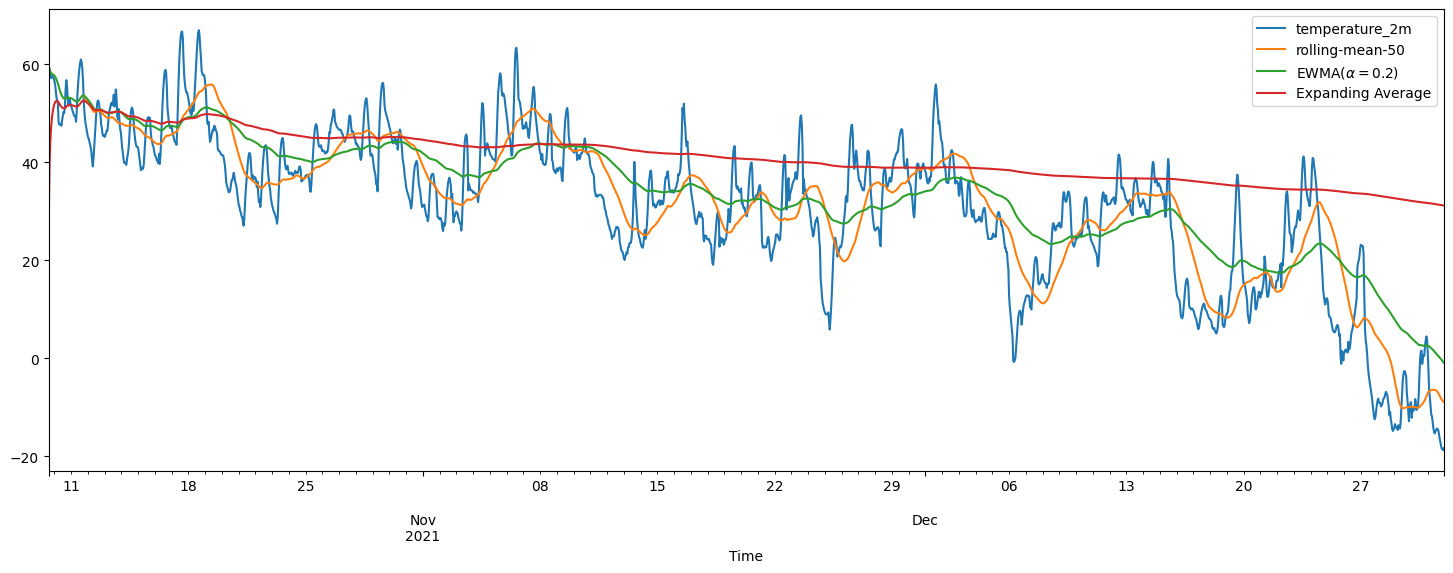

In [52]:
(df.tail(2000).select([pl.col("Time"), pl.col("temperature_2m"),
    pl.col("temperature_2m").rolling_mean(50).alias("rolling-mean-50"),
      pl.col("temperature_2m").ewm_mean(alpha= 0.01).alias("EWMA($\\alpha=0.2$)"),
      pl.col("temperature_2m").alias("Expanding Average").cum_sum() / (pl.col("temperature_2m").cum_count() + 1)
          ])).to_pandas().set_index("Time").plot(figsize = (18,6))

Text(180.59722222222223, 0.5, 'Power')

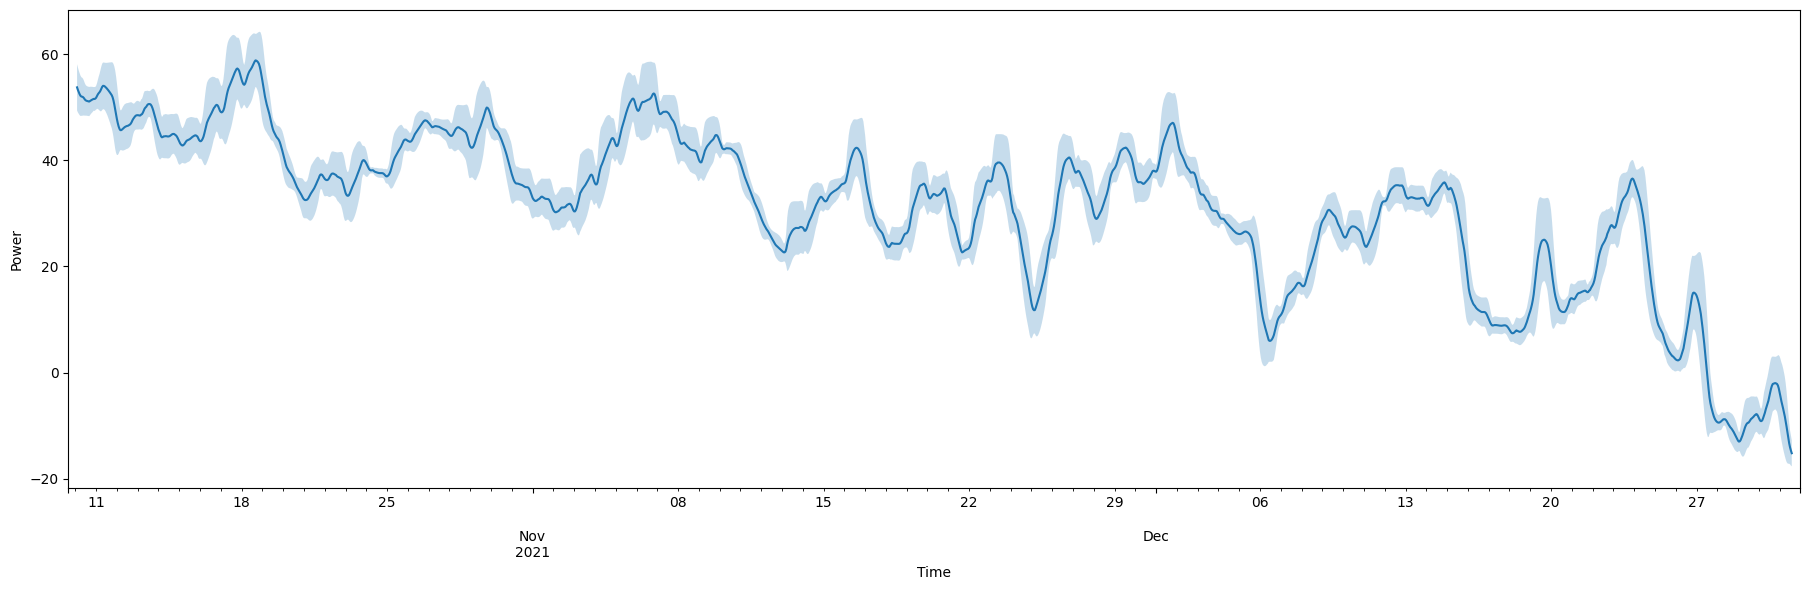

In [53]:
mean_std_pl = df.tail(2000).with_columns(
    [
        pl.col("temperature_2m").rolling_mean(20, center=True).alias("mean"),
        pl.col("temperature_2m").rolling_std(20, center=True).alias("std"),
    ]
)
ax = mean_std_pl.to_pandas().set_index("Time")["mean"].plot(figsize = (18,6))
ax.fill_between(
    mean_std_pl["Time"].to_numpy(),
    mean_std_pl["mean"] - mean_std_pl["std"],
    mean_std_pl["mean"] + mean_std_pl["std"],
    alpha=0.25,
)
plt.tight_layout()
plt.ylabel("Power")

# Visualización con Polars

Para usar la visualización con `Polars` se necesita installar

- `pip install hvplot`


In [54]:
import hvplot

In [57]:
df_diff.head()

Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,diferenciado
datetime[μs],f64,i64,f64,f64,f64,i64,i64,f64,f64,f64
2017-01-02 00:00:00,14.5,91,12.4,6.37,9.58,68,72,9.9,0.2574,null
2017-01-02 01:00:00,14.5,92,12.7,6.46,9.23,68,72,9.5,0.2535,0.0
2017-01-02 02:00:00,14.7,92,12.7,6.18,9.27,67,74,9.4,0.2497,0.2
2017-01-02 03:00:00,14.7,92,12.8,5.91,9.08,62,69,9.1,0.2458,0.0
2017-01-02 04:00:00,14.8,92,12.9,5.88,8.72,58,65,8.7,0.2419,0.1


In [56]:
df_diff.tail(2000).plot.line(x = "Time", y = "temperature_2m")

:Curve   [Time]   (temperature_2m)

In [58]:
df_diff.tail(2000).plot.line(x = "Time", y = "diferenciado")

:Curve   [Time]   (diferenciado)

In [64]:
lags.tail(2000).plot.line(x = "Time", y = "lags5")


:Curve   [Time]   (lags5)

# Bibliografía

* Sitio web de Polars: [https://docs.pola.rs/py-polars/html/reference/](https://docs.pola.rs/py-polars/html/reference/)
* Documentación de Polars: [https://docs.pola.rs/py-polars/html/reference/](https://docs.pola.rs/py-polars/html/reference/)
